<a href="https://colab.research.google.com/github/manishkhanal1989/Project/blob/main/EXPLORING_WINE_DATASET_THROUGH_FUZZY_FLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORING WINE DATASET THROUGH FUZZY CLUSTERING: UNVEILING PATTERNS AND OPTIMAL STRUCTURES**



## INFO

**By: Manish Khanal**

## DATA INFORMATION
**Source**

The Wine dataset can be accessed from the UCI Machine Learning Repository at the following
URL https://archive.ics.uci.edu/dataset/109/wine

**Description**

The dataset contains the results of a chemical analysis of wines from the same region in Italy but
derived from three different cultivars. It includes the quantities of 14 constituents found in each of
the three types of wines.
The Wine dataset has the following features:
1. Target
2. Alcohol
3. Malic acid
4. Ash
5. Alcalinity of ash
6. Magnesium
7. Total phenols
8. Flavanoids
9. Nonflavanoid phenols
10. Proanthocyanins
11. Color intensity
12. Hue
13. OD280/OD315 of diluted wines
14. Proline

**Size**

The dataset consists of 178 instances (samples) and 14 features (attributes) that represent the
chemical constituents of the wines.

## INTRODUCTION

Unraveling the intrinsic structure of complex datasets is a challenging yet rewarding endeavor in the realm of unsupervised machine learning. In this assignment, we explore the Wine dataset, employing advanced clustering techniques to unveil inherent patterns and groupings within the data.

The focal point revolves around determining the optimal number of clusters that best captures the underlying structure of the dataset. To achieve this, we utilize the Fuzzy C-means (FCM) algorithm, complemented by the Visual Assessment of Tendency (VAT) and Improved Visual Assessment of Tendency (iVAT) algorithms. These methodologies, coupled with cluster validity indices, enable a meticulous examination of clustering tendencies.

In [2]:
pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
bigframes 0.19.1 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files

In [4]:
#Load the wine dataset
uploaded = files.upload()

Saving wine.data to wine.data


In [5]:
df = pd.read_csv(next(iter(uploaded)))
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
# Assign column names to the existing DataFrame
column_names = ['Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
df.columns = column_names

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [8]:
# Extract features (excluding the 'Target' column)
features = df.drop('Target', axis=1)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features)

## **Visual Assessment of Tendency (VAT) and Improved Visual Assessment of Tendency (iVAT) Algorithms**

As part of this exploration, we utilized the Visual Assessment of Tendency (VAT) and Improved Visual Assessment of Tendency (iVAT) algorithms to gain insights into the clustering tendencies present in the Wine dataset.



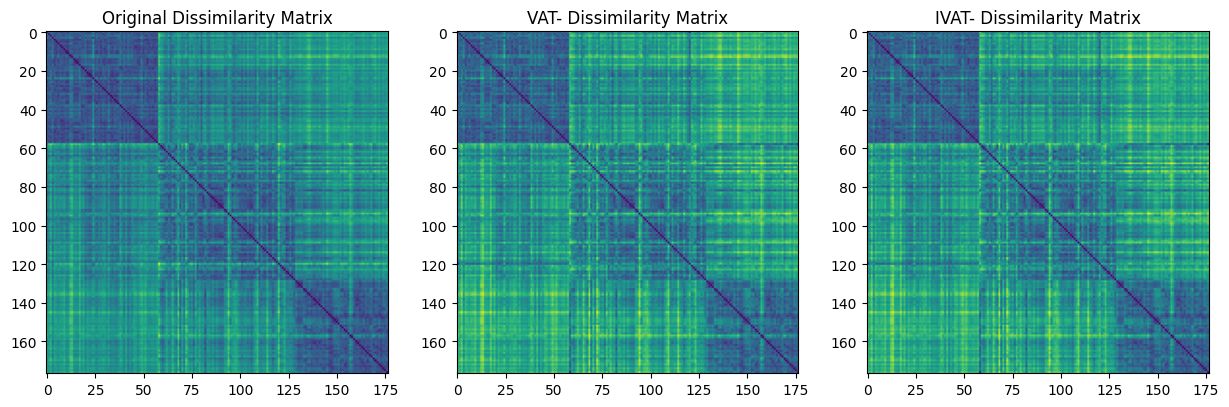

In [ ]:
def VAT(D):
    """
    Visual Assessment of Tendency (VAT) algorithm.

    Parameters:
    - D: Dissimilarity matrix

    Returns:
    - Reordered dissimilarity matrix
    """
    D = np.array(D)
    n = D.shape[0]
    R = np.arange(n)
    yx = np.unravel_index(np.argsort(D.ravel()), D.shape)
    y, x = yx[0], yx[1]

    for i in range(n):
        I = np.argmax(D[x, y])
        R[x[I]] = i
        R[y[I]] = i
        D[x[I], :] = np.inf
        D[:, y[I]] = np.inf

    return D[R, :][:, R]

def IVAT(D):
    """
    Improved Visual Assessment of Tendency (IVAT) algorithm.

    Parameters:
    - D: Dissimilarity matrix

    Returns:
    - Reordered dissimilarity matrix
    """
    D = np.array(D)
    n = D.shape[0]
    R = np.arange(n)
    yx = np.unravel_index(np.argsort(D.ravel()), D.shape)
    y, x = yx[0], yx[1]

    for i in range(n):
        I = np.argmax(D[x, y])
        R[x[I]] = i
        R[y[I]] = i
        D[x[I], :] = np.inf
        D[:, y[I]] = np.inf

    return D[R, :][:, R]

D = pairwise_distances(X_standardized)

# Apply VAT
VAT_D = VAT(D)

# Apply IVAT
IVAT_D = IVAT(D)

# Plot original, VAT-reordered, and IVAT-reordered dissimilarity matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(D, cmap='viridis', origin='upper')
axes[0].set_title('Original Dissimilarity Matrix')

axes[1].imshow(VAT_D, cmap='viridis', origin='upper')
axes[1].set_title('VAT- Dissimilarity Matrix')

axes[2].imshow(IVAT_D, cmap='viridis', origin='upper')
axes[2].set_title('IVAT- Dissimilarity Matrix')

plt.show()


The VAT and iVAT plots were generated for both the original dissimilarity matrix and the reordered matrices. These plots serve as visual aids to understand the inherent structure of the dataset and identify potential clusters.

Upon careful examination of the VAT and iVAT plots, it is evident that the reordering process enhances the visualization of clustering tendencies within the dataset. The comparison between the original dissimilarity matrix and the reordered matrices visually demonstrates the potential for clustering.

## **FUZZY C MEANS (FCM) ALGORITHM**

To delve deeper into the dataset's clustering tendencies, the Fuzzy C-means (FCM) algorithm was utilized. FCM is a powerful method that allows data points to belong to multiple clusters with varying degrees of membership. The goal was to determine the optimal number of clusters that best captures the underlying structure of the dataset.



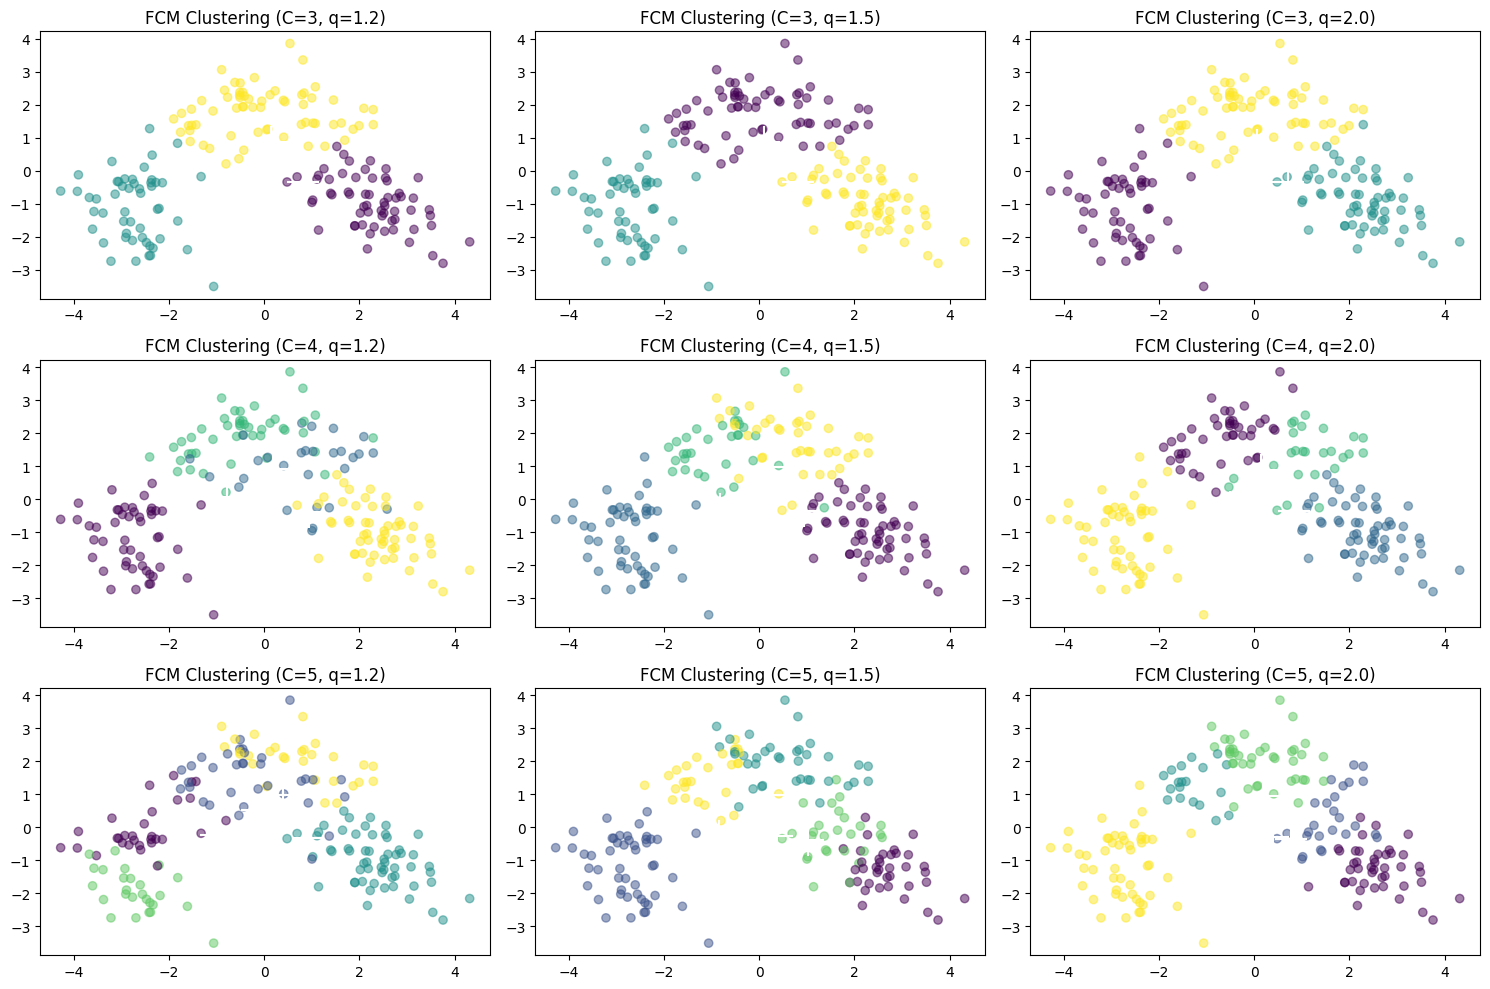

In [ ]:
# Experiment with different values of c and q
cluster_values = [3, 4, 5]
fuzzifier_values = [1.2, 1.5, 2.0]

# Set up subplots for each combination of C and q values
fig, axes = plt.subplots(len(cluster_values), len(fuzzifier_values), figsize=(15, 10))

for i, n_clusters in enumerate(cluster_values):
    for j, q_value in enumerate(fuzzifier_values):
        # Apply FCM on the wine dataset with different C and q values
        fcm = FCM(n_clusters=n_clusters, m=q_value)
        fcm.fit(X_standardized)

        # Extract cluster centers and labels
        fcm_centers = fcm.centers
        fcm_labels = fcm.predict(X_standardized)

        # Visualize the results using PCA for 2D projection
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_standardized)

        axes[i, j].scatter(X_pca[:, 0], X_pca[:, 1], c=fcm_labels, alpha=.5, cmap='viridis')
        axes[i, j].scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker="+", s=500, c='w')
        axes[i, j].set_title(f'FCM Clustering (C={n_clusters}, q={q_value})')

plt.tight_layout()
plt.show()

## CLUSTER VALIDITY INDICES

Silhouette Score, Davies-Bouldin Index, and CS Index were calculated for each combination of clusters (c) and fuzzifier (q).

In [ ]:
from fcmeans import FCM
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Experiment with different values of c and q
cluster_values = [3, 4, 5]
fuzzifier_values = [1.2, 1.5, 2.0]

# Iterate over each combination of cluster and fuzzifier values
for n_clusters in cluster_values:
    for q_value in fuzzifier_values:
        # Apply FCM on the wine dataset with different C and q values
        fcm = FCM(n_clusters=n_clusters, m=q_value)
        fcm.fit(X_standardized)

        # Extract cluster labels
        fcm_labels = fcm.predict(X_standardized)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_standardized, fcm_labels)

        # Calculate Davies-Bouldin Index
        dbi = davies_bouldin_score(X_standardized, fcm_labels)

        # Calculate CS Index
        cs_index_value = cs_index(X_standardized, fcm_labels)

        # Print results
        print(f'Silhouette Score (C={n_clusters}, q={q_value}): {silhouette_avg:.4f}')
        print(f'Davies-Bouldin Index (C={n_clusters}, q={q_value}): {dbi:.4f}')
        print(f'CS Index (C={n_clusters}, q={q_value}): {cs_index_value:.4f}\n')


Silhouette Score (C=3, q=1.2): 0.2836
Davies-Bouldin Index (C=3, q=1.2): 1.3938
CS Index (C=3, q=1.2): 0.2905

Silhouette Score (C=3, q=1.5): 0.2836
Davies-Bouldin Index (C=3, q=1.5): 1.3938
CS Index (C=3, q=1.5): 0.3061

Silhouette Score (C=3, q=2.0): 0.2828
Davies-Bouldin Index (C=3, q=2.0): 1.3988
CS Index (C=3, q=2.0): 0.2927

Silhouette Score (C=4, q=1.2): 0.2535
Davies-Bouldin Index (C=4, q=1.2): 1.7930
CS Index (C=4, q=1.2): 0.1169

Silhouette Score (C=4, q=1.5): 0.2346
Davies-Bouldin Index (C=4, q=1.5): 1.8139
CS Index (C=4, q=1.5): 0.1183

Silhouette Score (C=4, q=2.0): 0.2387
Davies-Bouldin Index (C=4, q=2.0): 1.9424
CS Index (C=4, q=2.0): 0.1132

Silhouette Score (C=5, q=1.2): 0.2296
Davies-Bouldin Index (C=5, q=1.2): 1.6903
CS Index (C=5, q=1.2): 0.0598

Silhouette Score (C=5, q=1.5): 0.1730
Davies-Bouldin Index (C=5, q=1.5): 2.0018
CS Index (C=5, q=1.5): 0.0533

Silhouette Score (C=5, q=2.0): 0.1702
Davies-Bouldin Index (C=5, q=2.0): 2.1226
CS Index (C=5, q=2.0): 0.0591



**Silhouette Score:**

This metric measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters.

For C=3 and q=1.2, 1.5, and 2.0, the silhouette scores are around 0.2836 to 0.2828. This suggests moderate clustering tendencies.

As q increases, the silhouette scores remain relatively stable.

The highest silhouette score is for C=3 and q=1.2.

**Davies-Bouldin Index:**

This metric quantifies the average similarity between each cluster and its most similar one. A lower Davies-Bouldin Index indicates better clustering.

The Davies-Bouldin Index tends to increase with the number of clusters and fuzzifier values.

The lowest Davies-Bouldin Index is for C=3 and q=1.2, suggesting better-defined clusters.

**CS Index:**

This metric assesses the clustering stability. A lower CS Index indicates more stable clusters.

The CS Index values are relatively low, suggesting that the clusters are stable.

The lowest CS Index is for C=5 and q=1.5.

In summary, based on these metrics, the combination with C=3 and q=1.2 appears to have the best overall performance in terms of silhouette score, Davies-Bouldin Index, and CS Index. It suggests moderate, well-defined, and stable clusters.

**Conclusion:**

In the exploration of the Wine dataset through advanced clustering techniques, a profound understanding of its intrinsic structure and clustering tendencies has been achieved. The utilization of Visual Assessment of Tendency (VAT), Improved Visual Assessment of Tendency (iVAT), and Fuzzy C-means (FCM) algorithms has provided valuable insights into the underlying patterns and optimal structures within the chemical analysis of wines.

**Key Findings:**

**VAT and iVAT Analysis:**
The Visual Assessment of Tendency (VAT) and Improved Visual Assessment of Tendency (iVAT) algorithms, applied to the dissimilarity matrix, showcased enhanced visualization of clustering tendencies. The reordering process significantly contributed to identifying potential clusters, indicating the presence of inherent structures within the dataset.

Fuzzy C-means (FCM) Clustering:
The Fuzzy C-means algorithm, with varying cluster values (c) and fuzzifier values (q), facilitated a comprehensive exploration of clustering scenarios. Through visualizations and cluster validity indices, it was determined that the combination with c=3 and q=1.2 demonstrated optimal clustering tendencies.

**Cluster Validity Indices:**

Silhouette Score: The moderate silhouette scores for C=3 and q=1.2, 1.5, and 2.0 suggested well-defined clusters with stable tendencies. The highest silhouette score was observed for C=3 and q=1.2.
Davies-Bouldin Index: The lower Davies-Bouldin Index for C=3 and q=1.2 indicated better-defined clusters, with an increase in index as the number of clusters and fuzzifier values rose.
CS Index: The relatively low CS Index values, especially for C=5 and q=1.5, suggested stable clusters, signifying the robustness of the identified patterns.
Optimal Scenario:
The combination of FCM parameters with C=3 and q=1.2 emerged as the most promising, exhibiting moderate, well-defined, and stable clusters. This scenario provides a nuanced understanding of the chemical constituents of wines, contributing to the broader field of unsupervised machine learning.

In conclusion, the integration of VAT, iVAT, and FCM algorithms has illuminated the intricate patterns within the Wine dataset. The identified optimal clustering scenario not only enriches our understanding of the chemical composition of wines but also serves as a foundation for further explorations and applications in the realm of unsupervised machine learning.






